In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from model import design_model

In [2]:
BATCH_SIZE = 32 # 32 images in a batch
RESCALE = 1 / 255 # for pixel normalization

Preprocessing image data.  
We use `ImageDataGenerators` to load images from a file path, and to preprocess them.  
To split the data into a training set and a validation set,
we create two different iterable objects: a `training_iterator` and a `validation_iterator`.

In [3]:
training_data_generator = ImageDataGenerator(
    rescale = RESCALE
)

training_iterator = training_data_generator.flow_from_directory(
    "dataset/train",
    class_mode = "categorical",
    color_mode = "grayscale",
    batch_size = BATCH_SIZE
)

Found 251 images belonging to 3 classes.


In [4]:
validation_data_generator = ImageDataGenerator(
    rescale = RESCALE
)

validation_iterator = validation_data_generator.flow_from_directory(
    "dataset/test",
    class_mode = "categorical",
    color_mode = "grayscale",
    batch_size = BATCH_SIZE
)

Found 66 images belonging to 3 classes.


In [5]:
# use model function:
model = design_model()

# early stopping implementation:
es = EarlyStopping(monitor = 'val_auc', mode = 'min', verbose = 1, patience = 10)

# fit the model with 10 ephochs and early stopping:
history = model.fit(
    training_iterator,
    steps_per_epoch = training_iterator.samples / BATCH_SIZE,
    epochs = 15,
    validation_data = validation_iterator,
    validation_steps = validation_iterator.samples / BATCH_SIZE,
    callbacks = [es]
)

Epoch 1/15
7/7 [==============================] - 3s 280ms/step - loss: 1.0413 - categorical_accuracy: 0.4343 - auc: 0.6508 - val_loss: 1.0501 - val_categorical_accuracy: 0.3939 - val_auc: 0.6908
Epoch 2/15
7/7 [==============================] - 2s 208ms/step - loss: 0.9274 - categorical_accuracy: 0.5299 - auc: 0.7704 - val_loss: 0.9277 - val_categorical_accuracy: 0.6364 - val_auc: 0.8541
Epoch 3/15
7/7 [==============================] - 2s 213ms/step - loss: 0.7632 - categorical_accuracy: 0.7809 - auc: 0.8998 - val_loss: 0.7519 - val_categorical_accuracy: 0.6667 - val_auc: 0.9024
Epoch 4/15
7/7 [==============================] - 2s 211ms/step - loss: 0.6129 - categorical_accuracy: 0.7729 - auc: 0.9120 - val_loss: 0.6175 - val_categorical_accuracy: 0.7273 - val_auc: 0.9225
Epoch 5/15
7/7 [==============================] - 2s 212ms/step - loss: 0.4806 - categorical_accuracy: 0.8207 - auc: 0.9409 - val_loss: 0.5752 - val_categorical_accuracy: 0.6818 - val_auc: 0.9051
Epoch 6/15
7/7 [====

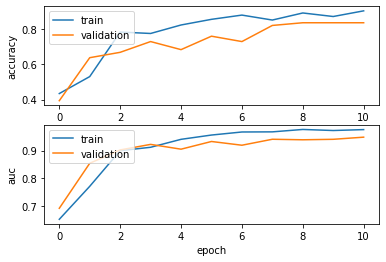

In [6]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc = 'upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc = 'upper left')

plt.show()

In [7]:
test_steps_per_epoch = np.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps = test_steps_per_epoch)
test_steps_per_epoch = np.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

3/3 [==============================] - 0s 71ms/step
              precision    recall  f1-score   support

       Covid       0.47      0.54      0.50        26
      Normal       0.32      0.30      0.31        20
   Pneumonia       0.35      0.30      0.32        20

    accuracy                           0.39        66
   macro avg       0.38      0.38      0.38        66
weighted avg       0.39      0.39      0.39        66

